#  1. 그래프탐색(순회)
### 그래프는 컴퓨터 사이언스에서 풀고자하는 많은 문제들을  표현하는 데 매우 유용하다. 

###  10주 실습에서 살펴보았던 다음 [그림1 ] 의 그래프에 대해 깊이우선탐색, 너비우선탐색에 대해 살펴보기로 한다. 


![alt text](DFS_BFS.jpg "dfs_bfs")

![alt text](graph_no.png "Graph")

### 상기 [그림1]의  그래프에 대해  adjacency list 를 사용하며, 파이썬에서는 이를 dictionary 로 다음과 같이 표현한다.

In [1]:
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'] }
graph

{'S': ['B', 'L', 'N'],
 'B': ['F', 'L', 'N', 'S'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N']}

<br/>

# 깊이우선탐색 (Depth First Search)

깊이우선탐색에 대한 수도 코드(pseudo-code)는 아래와 같다. 

~~~python
DFS(graph G, start vertex s):
    // all nodes initially unexplored
    mark s as explored
    for every edge (s, v):
       if v unexplored:
          DFS(G, v)
~~~

### 다음은 깊이우선탐색에 의한 그래프 모든 노드의 탐색(순회) 알고리즘 구현이다. 

In [2]:
def dfs(graph, start, explored=[]):   
    if not start in graph:
        return None
    
    if start in explored:
        return explored

    explored = explored + [start]
    for w in graph[start]:
        if w not in explored:
            explored=dfs(graph, w, explored)
            #newpath=dfs(graph, w, explored)
            #if newpath: return newpath
    return explored

#### [그림 1]  의 그래프에 대해 깊이우선탐색 기반으로 모든 노드를 순회해보자.

In [3]:
dfs(graph, 'S')

['S', 'B', 'F', 'E', 'L', 'N']

### 깊이우선탐색에 의한 경로 찾기

#### 이전 10주 실습에서 살펴 본 길 찾기 알고리즘은 깊이우선탐색을 이용한 것이다.

In [4]:
def find_path_by_dfs(graph, start, end, path=[]):    
        
        if not start in graph:
            return None
        
        path = path + [start]
        
        if start == end:
            return path
  
        for node in graph[start]:
            for comp1 in node:
                if comp1 not in path:                
                    newpath = find_path_by_dfs(graph, comp1, end, path)
                    if newpath: return newpath
        return None 
        

#### [그림 1]  의 그래프에 대해 깊이우선탐색 기반으로 경로 하나를 탐색해보자.

In [5]:
find_path_by_dfs(graph, 'N', 'F')

['N', 'B', 'F']

### 깊이우선탐색으로 모든 경로 찾기 
#### 이전 10주 실습에서 살펴본 모든 경로 찾기는 깊이우선탐색을 이용한 것이다.
#### 본 실습에서는 경로가 사이클은 포함하지 않는 것으로 한다. 즉, 경로에서 동일한 노드가 두 번 이상 들어가지 않는 것으로 한다.¶

In [6]:
def find_all_paths_by_dfs(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if not start in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths_by_dfs(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

#### [그림 1]  의 그래프에 대해 깊이우선탐색 기반으로 모든 경로를 탐색해보자.

In [7]:
find_all_paths_by_dfs(graph, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'L', 'F']]

<br/>

# 너비우선탐색(Breadth First Search)
너비우선탐색에 대한 수도 코드(pseudo-code)는 아래와 같다.

~~~python
BFS(graph G, start vertex s):
    // all nodes initially unexplored
    mark s as explored
    let Q = queue data structure, initialized with s
    while Q is non-empty:
        remove the first node of Q, call it v
        for each edge(v, w):  // for w in graph[v]
            if w unexplored:
                mark w as explored
                add w to Q (at the end)
            ~~~

### 다음은 너비우선탐색에 의한 그래프 모든 노드의 탐색(순회) 알고리즘이다. 

In [8]:
def bfs(graph, start): 
    explored, queue = list(), [start]  # collections.deque([start])
    explored.append(start)
    while queue:
        v = queue.pop(0)  # queue.popleft()
        for w in graph[v]:
            if w not in explored:                
                explored.append(w)
                queue.append(w)
    return explored

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 모든 노드를 순회해보자.

In [9]:
 bfs(graph, 'S')

['S', 'B', 'L', 'N', 'F', 'E']

### 너비우선탐색에 의한 경로 찾기
#### 본 실습에서는 경로가 사이클은 포함하지 않는 것으로 한다. 즉, 경로에서 동일한 노드가 두 번 이상 들어가지 않는 것으로 한다.¶

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 경로 한 개를 탐색해보자.

(방법 1)

In [10]:
import copy
def find_path_by_bfs(graph, start, end, path=[]):     
    
    if not start in graph:
            return None
        
    path = path + [start]
        
    if start == end:
        return path
    
    node_queue=[start]
    path_queue=[path]
    all_paths=[]

    while True:
#         print("path_queue=", path_queue)
        path=path_queue.pop(0)
        new_path=path
#         print("path=", path)
        v=path[-1]
#         print("v=", v)
        for w in graph[v]:        
            if w not in path: 
                path.append(w) 
#                 print("2nd_path=", path)
                if w==end: return path
                else: 
                    new_path= copy.deepcopy(path)
                    path_queue.append(new_path)                                             
                    path.pop()
    return path

In [11]:
find_path_by_bfs(graph, 'S', 'F')

['S', 'B', 'F']

(방법 2)

In [12]:
def find_path_by_bfs(graph, start, end):     
    path_queue = [[start]]
    paths = list()
    if not start in graph:
            return None
    if start == end:
        return path_queue

    while path_queue:
        v=path_queue.pop(0)
        for w in graph[v[-1]]:
            if end == w :
                    paths.append(v+[w])
                    continue
            if w not in v: 
                path_queue.append(v+[w])
    return paths[0] if paths else None

In [13]:
find_path_by_bfs(graph, 'S', 'F')

['S', 'B', 'F']

### 너비우선탐색으로 모든 경로 찾기 

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 모든 경로를 탐색해보자.

(방법 1)

In [14]:
import copy
def find_all_paths_by_bfs(graph, start, end, path=[]):     
    
    if not start in graph:
            return None
        
    path = path + [start]
        
    if start == end:
        return path
    
    node_queue=[start]
    path_queue=[path]
    all_paths=[]

    while True:        
        if path_queue: path=path_queue.pop(0)
        else: return all_paths    
        new_path=path        
        v=path[-1]       
        for w in graph[v]:        
            if w not in path: 
                path.append(w)            
                new_path= copy.deepcopy(path)
                if w==end: all_paths.append(new_path)
                else:                    
                    path_queue.append(new_path)                                             
                if path: path.pop()
    return all_paths

In [15]:
find_all_paths_by_bfs(graph, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F']]

(방법 2)

In [16]:
def find_all_paths_by_bfs(graph, start, end):     
    path_queue = [[start]]
    paths = list()
    if not start in graph:
            return None
    if start == end:
        return path_queue

    while path_queue:
        v=path_queue.pop(0)
        for w in graph[v[-1]]:
            if end == w :
                    paths.append(v+[w])
                    continue
            if w not in v: 
                path_queue.append(v+[w])
    return paths if paths else None

In [17]:
find_all_paths_by_bfs(graph, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F']]

<br/><br/>

# 2. Dijkstra's Algorithm for Shortest-distance   
####  10주 실습에서는 그래프의 시작노드와 종단노드간의 최단 거리를 구한 알고리즘을 살펴보았다. 
### 다익스트라 알고리즘은 시작노드로부터 그래프의 모든 노드까지의 최단 거리들을 구한다.

In [18]:
graph3 = {'S': {'B': 175, 'E': float("inf"), 'F': float("inf"), 'L': 125, 'N': 320, 'S':0},
          'B': {'B': 0, 'E': float("inf"), 'F': 245, 'L': 115, 'N': 145, 'S': 175},
          'L': {'B': 115, 'E': 645, 'F': 220, 'L': 0, 'N': 260, 'S': 125},
          'N': {'B': 145, 'E': float("inf"), 'F': 385, 'L': 260, 'N': 0, 'S': 320},
          'E': {'B': float("inf"), 'E': 0, 'F': 450, 'L': 645, 'N': float("inf"), 'S': float("inf")},
          'F': {'B': 245, 'E': 450, 'F': 0, 'L': float("inf"), 'N': 305, 'S': float("inf")}}

위 그래프에 대해 다익스트라 알고리즘을 적용해보자.

In [19]:
def Dijkstra(graph, src) :
    if src not in graph :
        return print("source node is not in the given graph")
    # Initialize : path == {노드 이름 : [시작 노드와의 거리, 시작 노드와의 최단 경로], ...}
    paths = {node:[float('inf'), None] for node in graph}
    path_queue = [[src]]
    
    # Start Dijkstra
    paths[src] = [0, [src]]
    while path_queue:
        v=path_queue.pop(0)
        for w in graph[v[-1]]:
            if graph[v[-1]][w] != float('inf') :  
                d = paths[v[-1]][0]+graph[v[-1]][w]
                if paths[w][0] > d :
                    # remove exist path in path queue
                    for path in path_queue :
                        if path[-1] == w :
                            path_queue.remove(path)
                    paths[w] = [d, v+[w]]
                    path_queue.append(paths[w][1])
    return paths if paths else None

In [20]:
Dijkstra(graph3, 'S')

{'S': [0, ['S']],
 'B': [175, ['S', 'B']],
 'L': [125, ['S', 'L']],
 'N': [320, ['S', 'N']],
 'E': [770, ['S', 'L', 'E']],
 'F': [345, ['S', 'L', 'F']]}

### 다음 [그림 2]경우에, 시작노드 'A'에서  다른 노드들까지의 최단 거리를 구해보자.
![Altext](grp1.jpg)

In [21]:
graph4 = {'A': {'A': 0, 'B': 8, 'C': 2, 'D': 4,'E': float("inf"), 'F':float("inf")},
          'B': {'A': 8, 'B': 0, 'C': 7, 'D': float("inf"),'E': 2, 'F': float("inf")},
          'C': {'A': 2, 'B': 7, 'C': 0, 'D': 1,'E': 3, 'F':9 },
          'D': {'A': 4, 'B':float("inf"), 'C': 1, 'D': 0,'E': float("inf"), 'F': 5},
          'E': {'A': float("inf"), 'B': 2, 'C': 3, 'D': float("inf"),'E': 0, 'F': float("inf")},
          'F': {'A': float("inf"), 'B':float("inf"), 'C': 9, 'D': 5,'E': float("inf"), 'F':0},
         }            

In [22]:
Dijkstra(graph4, 'A')

{'A': [0, ['A']],
 'B': [7, ['A', 'C', 'E', 'B']],
 'C': [2, ['A', 'C']],
 'D': [3, ['A', 'C', 'D']],
 'E': [5, ['A', 'C', 'E']],
 'F': [8, ['A', 'C', 'D', 'F']]}

#### 그래프 adjacency matrix 표현이 순서가 다르더라도 다익스트라 알고리즘은 적용됨을 살펴 보자.  

In [23]:
graph5 = {'A': {'A': 0, 'B': 8, 'C': 2, 'D': 4,'E': float("inf"), 'F':float("inf")},       
          'C': {'A': 2, 'B': 7, 'C': 0, 'D': 1,'E': 3, 'F':9 },
          'D': {'A': 4, 'B':float("inf"), 'C': 1, 'D': 0,'E': float("inf"), 'F': 5},
          'E': {'A': float("inf"), 'B': 2, 'C': 3, 'D': float("inf"),'E': 0, 'F': float("inf")},
          'B': {'A': 8, 'B': 0, 'C': 7, 'D': float("inf"),'E': 2, 'F': float("inf")},
          'F': {'A': float("inf"), 'B':float("inf"), 'C': 9, 'D': 5,'E': float("inf"), 'F':0},
         }            

In [24]:
Dijkstra(graph5, 'A')

{'A': [0, ['A']],
 'C': [2, ['A', 'C']],
 'D': [3, ['A', 'C', 'D']],
 'E': [5, ['A', 'C', 'E']],
 'B': [7, ['A', 'C', 'E', 'B']],
 'F': [8, ['A', 'C', 'D', 'F']]}

<br/><br/>

# 3. 그래프 컬러링 
#### 아래 그림처럼 [그림1]과 같은 그래프에서 각 노드 색을 인접한 노드들과 다른 색깔로 칠하는 그래프 컬러링 알고리즘에 대해 살펴 본다. 

![Alttext](graph_coloring.png)

In [25]:
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N']}
graph

{'S': ['B', 'L', 'N'],
 'B': ['F', 'L', 'N', 'S'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N']}

In [26]:
def promising(graph, node,  colors_of_nodes, color):  
    for neighbor in graph[node]:        
        if neighbor in set(colors_of_nodes.keys()):
            color_of_neighbor = colors_of_nodes[neighbor]  
        else: color_of_neighbor= None     
       
        if color_of_neighbor == color:
            return False
    return True

def get_color_for_node(graph, node,  colors_of_nodes, color_table):
    for color in color_table:  
        if promising(graph, node,  colors_of_nodes, color):
            return color

def graph_coloring(graph, color_table):
    colors_of_nodes = {}
    for node in graph:  
        colors_of_nodes[node] = get_color_for_node(graph, node,  colors_of_nodes, color_table)
    return colors_of_nodes


### 상기 [그림 1] 에 적용한 graph coloring 결과는 다음과 같다. 

In [27]:
color_table = ['Red', 'Blue', 'Green', 'Yellow', 'Violet', 'Black']
graph_coloring(graph, color_table)

{'S': 'Red',
 'B': 'Blue',
 'L': 'Green',
 'N': 'Yellow',
 'E': 'Red',
 'F': 'Violet'}

<b>위에서 구한 컬러 그래프를 그려보자.</b>

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
def draw_colored_graph(graph, color = None, pos = None) :
    G = nx.Graph()
    nodes = graph.keys()
    edges = [(src, dst) for src in graph for dst in graph[src] ]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    
    plt.figure(figsize=(10, 10))
    if not color : color = 'cyan'
    if not pos : pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color=color)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


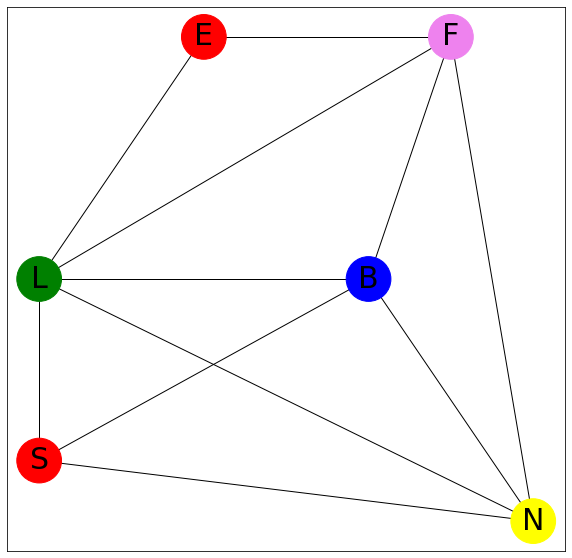

In [30]:
pos = {'B':(2,2), 'E':(1,4), 'F':(2.5, 4), 'L':(0,2), 'N':(3, 0), 'S':(0, 0.5)}
color = graph_coloring(graph, color_table)
draw_colored_graph(graph, pos=pos, color=list(color.values()))

#### 상기 [그림 1]은 planar graph 가 아니어서,  5 color 미만 색칠하기가 적용되지 않는다. 
#### 다음 [그림 4]와 같은 지도에 대해서 graph coloring 을 적용해보자.
![Altext](map.png)

#### 교과서에서 배운 바대로 [그림4]에 대해 다음과 같이 dual graph 를 구한 후에 dual graph 의 그래프 표현을 구한 후에  상기 graph coloring 알고리즘을 적용해보자.  
![Altext](dual_graph.png)

In [31]:
dual_graph = {'a': ['b', 'c', 'd', 'e'],
       'b': ['a', 'c', 'd'],
       'c': ['a', 'b', 'd'],
       'd': ['a', 'b', 'c', 'e', 'f', 'g'],
       'e': ['a', 'd', 'f', 'g'],
       'f': ['d', 'e', 'g'],
       'g': ['d', 'e', 'f']   
             }
dual_graph

{'a': ['b', 'c', 'd', 'e'],
 'b': ['a', 'c', 'd'],
 'c': ['a', 'b', 'd'],
 'd': ['a', 'b', 'c', 'e', 'f', 'g'],
 'e': ['a', 'd', 'f', 'g'],
 'f': ['d', 'e', 'g'],
 'g': ['d', 'e', 'f']}

In [32]:
color_table = ['Red', 'Blue', 'Green', 'Yellow', 'Violet']
graph_coloring(dual_graph, color_table)

{'a': 'Red',
 'b': 'Blue',
 'c': 'Green',
 'd': 'Yellow',
 'e': 'Blue',
 'f': 'Red',
 'g': 'Green'}

#### 상기 graph coloring 알고리즘을 적용한 결과는 다음 [그림 6] 와 같다.
![Altext](colored_map.png)

<b>실제로 위에서 만든 함수를 이용하여 직접 그래프를 그려보자.</b>

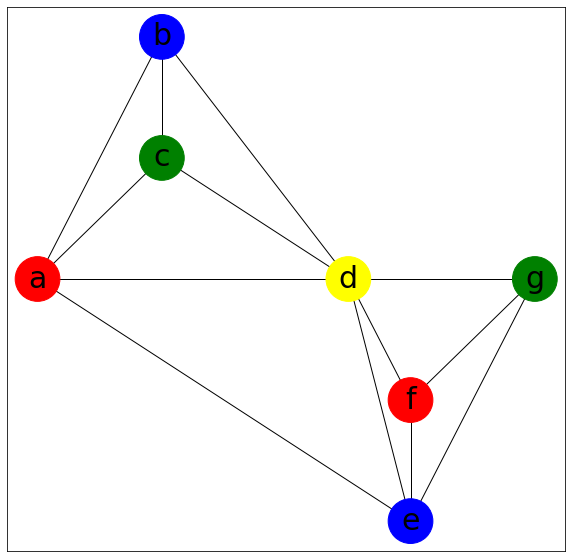

In [33]:
color = graph_coloring(dual_graph, color_table)
pos = {'a':(0, 2),'b':(1, 4),'c':(1, 3),'d':(2.5, 2),'e':(3, 0),'f':(3, 1),'g':(4, 2)}
draw_colored_graph(dual_graph, color.values(), pos)

<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제

<h2>※ 오일러 경로(Euler Path) 찾기 </h2>

<h3>오일러 경로는 그래프의 모든 엣지를 한 번씩만 통과하면서 방문하는 경로로 다음과 같은 절차로 구한다.</h3>

<ol>
    <li>주어진 그래프에서 홀수점의 갯수를 찾는다. 이때, 홀수점이 2개가 아니면 오일러 경로는 없다. 홀수점이 2개인 경우에 2개 중 하나는 시작노드로 다른 하나는 종단노드로 구성한다.</li>
<br/><li>주어진 그래프에서 시작노드에서 시작하여 종단노드까지의 시작-종단 경로(백본경로)를 찾는다.</li>
<br/><li>그래프에서  이 경로 또는 순환경로(circuit)에 있는 에지들은 제거한 남은 그래프를 만든다.</li>
<br/><li>남은 그래프에 대해 시작-종단 백본 경로에 있는 각 노드에 대해 순환 경로(circuit)가 있으면  찾는다. </li>
<br/><li>남은 그래프에서 남은 에지가 없어질 때까지  3)과 4)의 과정을 되풀이한다. </li>
<br/><li>이때, 오일러 경로는 백본 경로의 시작 노드. 시작노드에서의 순환 경로들, 백본 시작노드에서 백본의 다음 중간 노드까지 경로, 이 백본 중간노드들에서의 순환 경로들,  백본 중간노드에서 백본 다음 중간노드까지의 경로, 이 백본 중간노드에서의 순환경로, ... , 백본 중간노드에서 백본 종단노드까지의 경로,  종단노드에서의 순환 경로들 로 구성된다.  </li>
</ol>

참고 : [오일러 경로](https://en.wikipedia.org/wiki/Eulerian_path)
 - 즉, 그래프에서 두 홀수점에 대한 엣지를 제거하면 오일러 회로가 만들어지기 때문에 오일러 회로에 대해 찾는 과정 (3, 4, 5)를 수행하고 마지막에 과정 2에서 수행한 경로를 추가하면 오일러 경로가 완성된다. 

![alt text](Euler_graph_no.png "Graph")  

#  

### 상기 [그림 7]의  그래프를 예제로 오일러 경로 알고리즘을 살펴 보기로 한다.  
그래프를 표현하는 방법으로는 다음과 같이 adjacency list를 사용하며,  파이썬에서는 adjacency list를 dictionary 로 표현한 것이 유용하다.  
 (예 ; [그림 7] 그래프 경우)
~~~python
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }.
~~~
 
### 그래프의 에지는 에지를 구성하는 2개의 노드(vertex) 쌍 의 튜플(tuple) 로 표현할 수 있다. 
즉, 상기 [그림 5]에서 노드 'S' 와 노드 'N' 을 연결하는 에지는 ('S', 'N') 으로 표현한다.  이때, 노드쌍 튜플의 첫번째  노드 'S'들 시작노드 , 두번째 노드 'N' 을 종단 노드로 간주하는 경우에 이 에지를 방향성 에지라 하며, 이를 구분하지 않는 경우를 비방향성 에지라 한다. 방향성 에지에서는 ('S', 'N') 와 ('N', 'S' ) 는 다른 에지이나,  비방향성 에지에서는 둘다 같은 에지이다.


<h3 style='line-height:150%;'> 1. 상기 dictionary 형태의 adjacency list  로 기술되는 그래프에서 주어진 시작 노드와 종단 노드간의 모든 경로를 찾는 파이썬 함수를 구하고, 시작노드 'B' 에서 종단 노드 'F'  로 끝나는 모든 경로를 구해보시오. </h2>

<br/>※ 풀이조건
<ol>
    <li>DFS 또는 BFS 를 이용하면 쉽게 풀 수 있다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>반드시 함수를 작성하고 경로를 같이 출력해야 한다. 함수를 작성하지 않고 답만 출력할 시 0점 처리한다.</li>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

In [34]:
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }

def find_all_paths_by_dfs(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if not start in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths_by_dfs(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths
find_all_paths_by_dfs(graph, 'B', 'F')

[['B', 'F'],
 ['B', 'L', 'E', 'F'],
 ['B', 'L', 'N', 'F'],
 ['B', 'L', 'S', 'N', 'F'],
 ['B', 'N', 'F'],
 ['B', 'N', 'L', 'E', 'F'],
 ['B', 'N', 'S', 'L', 'E', 'F'],
 ['B', 'S', 'L', 'E', 'F'],
 ['B', 'S', 'L', 'N', 'F'],
 ['B', 'S', 'N', 'F'],
 ['B', 'S', 'N', 'L', 'E', 'F']]

<h3 style='line-height:150%;'>  2. 상기 dictionary 형태의 adjacency list  로 기술되는 그래프에서,  모든 비방향성 엣지들의 집합을 구하는 파이썬 함수를 코딩하고, 이를 이용하여 [그림 7] 그래프의 모든 비방향성 엣지 집합을 구하시오. (같은 엣지의 경우, 시작 노드의 Alphabet 순서가 앞선 것만을 취하시오. )</h3>

#### 참고 : 알파벳 정렬

In [35]:
alphabet_list = [('apple', 1), ('grape', 3), ('banana', 2), ('pineapple', 4)]
sorted(alphabet_list, key=lambda x : x[0])

[('apple', 1), ('banana', 2), ('grape', 3), ('pineapple', 4)]

#### 참고 : 출력 예시
[('B', '?'), ('B', '?'), ('B', '?'), ('B', '?'), ('E', '?'), ('E', '?'), ('F', '?'), ('L', '?'), ('L', '?'), ('N', '?')]

<br/>※ 풀이조건
<ol>
    <li>위 출력 예시 형식과 동일하게 출력이 되어야 한다. (?에 대한 값은 스스로 풀어본다)</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>반드시 함수를 작성하고 엣지 집합을 같이 출력해야 한다. 함수를 작성하지 않고 답만 출력할 시 0점 처리한다.</li>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

In [36]:
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }

def find_all_nodes(graph, nodes=[]):
    for k in graph.keys():
        for node in graph[k]:
            list1=[]
            list1.append(k)
            list1.append(node)
            list1.sort()
            if not list1 in nodes:
                nodes.append(list1)
    nodes.sort()
    return nodes
               
find_all_nodes(graph)

[['B', 'F'],
 ['B', 'L'],
 ['B', 'N'],
 ['B', 'S'],
 ['E', 'F'],
 ['E', 'L'],
 ['F', 'N'],
 ['L', 'N'],
 ['L', 'S'],
 ['N', 'S']]

<h3 style='line-height:150%;'> 3. 홀수점이 2개인 그래프에서 홀수점에서 시작해서 그래프의 모든 에지를 한번만 거쳐 다른 홀수점으로 끝나는 경로인 오일러 경로를 구하는 파이썬 함수를 코딩하고, 이를 이용하여 상기 [그림 7] 그래프에 대해 노드 'S'에서 시작하여 노드 'F' 로 끝나는 오일러 경로를 구해보시오. (2점)</h3>

(아래 단계를 차근차근 풀어보면 문제를 쉽게 풀 수 있다.)

(위 [그림 7]에 대한 그래프를 직접 그리면서 수행하려면 아래 위치 정보 및 그리기 함수를 이용한다.)

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
def draw_colored_graph(graph, color = None, pos = None) :
    G = nx.Graph()
    nodes = graph.keys()
    edges = [(src, dst) for src in graph for dst in graph[src] ]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    
    plt.figure(figsize=(10, 10))
    if not pos : pos=nx.spring_layout(G)
    if not color : color = 'cyan'
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color=color)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

In [38]:
B,E,F,L,N,S = 'BEFLNS'
pos = {B:(2,2), E:(1,4), F:(2.5, 4), L:(0,2), N:(3, 0), S:(0, 0.5)}

#### 3-1) [그림 7]에 대한 그래프를 dictionary 형태로 만드시오. 

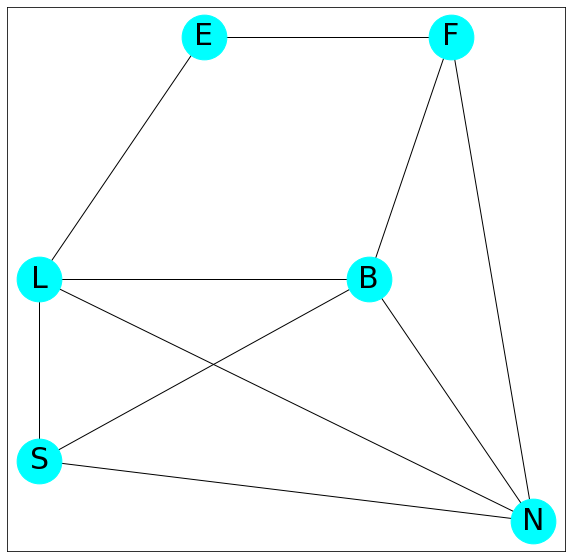

In [39]:
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }
draw_colored_graph(graph, color = None, pos=pos)

#### 3-2) 그래프에서 엣지가 홀수인 점을 찾는 함수를 만들어보시오.

In [40]:
def find_odd_points(graph, nodes=[]):
    for k in graph.keys():
        if len(graph[k])%2==1:
            nodes.append(k)
    return nodes

#### 3-3) 아래 출력 예시와 같이 상기 홀수점(노드)을 찾는 함수가 제대로 동작하는 지를 점검하시오.

출력예시:

In[] : find_odd_points(graph)

out[] : ['S', 'F']

In [41]:
find_odd_points(graph)

['S', 'F']

#### 3-4) 시작점(노드) 및 종단점(노드)을 임의로 정하고 시작노드에서 종단노드까지의 경로, 즉 시작-종단 경로(백본 경로)를 1개만 찾아보시오. 

In [42]:
def find_all_paths_by_dfs(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if not start in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths_by_dfs(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths
def find_path(graph, start, end):
    a=find_all_paths_by_dfs(graph, start, end)
    return a[0]

path=find_path(graph, 'S', 'F')
print(path)

['S', 'B', 'F']


#### 3-5) 그래프에서 위에서 찾은 경로를 제거한 그래프를 만드시오.

상기 결과는 [그림 7] 그래프에서 백본 경로 ['S', 'B', 'F'] 가 제거된, 다음 [그림 8] 그래프 표현이다.
![alt text](./graph_no_backbone.png)

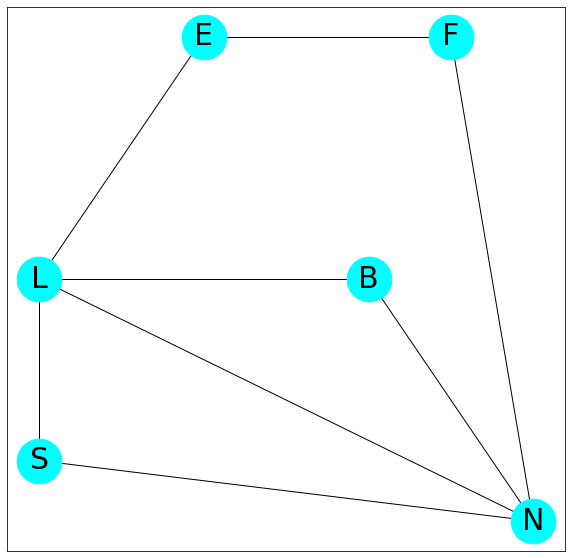

In [43]:
def remove_path(path,graph):
    for i in range(len(path)-1):
        graph[path[i]].remove(path[i+1])
        graph[path[i+1]].remove(path[i])
    return graph

newGraph=remove_path(path,graph)
draw_colored_graph(newGraph, color = None, pos=pos)

#### 3-6) 백본 경로 상의 노드에 대해 순환 경로(circuit)가 있으면 1개만  찾으시오.
(순환 경로란 출발 노드와 종단 노드가 동일한 경로를 말한다)

예를 들어 회로 ['S', 'L', 'B', 'N', 'S'] 는 다음 [그림 9]의 빨간색 회로 부분이다.
![Altext](./circuit_graph_no_backbone.png)

[그림 9]에서 빨간색 부분을 제거하면 다음과 [그림 10]의 그래프이며, 이 그래프의 표현은 아래와 같다.

{S': [], 'B': [], 'L': ['E', 'N'], 'N': ['F', 'L'], 'E': ['F', 'L'], 'F': ['E', 'N']}
![Altext](./graph_circuit_removed.png)

In [44]:
def circuit(graph, start, end=None, path=[]):    
        
        if not start in graph:
            return None
        path = path + [start]
        
        if start == end:
            return path
        if end==None:
            end = start
        for node in graph[start]:
            for comp1 in node:
                if len(path)>2 and comp1 not in path[1:]:                
                    newpath = circuit(graph, comp1, end, path)
                    if newpath: return newpath
                if comp1 not in path:                
                    newpath = circuit(graph, comp1, end, path)
                    if newpath: return newpath
        return None
circuitPath=circuit(graph, 'S')
print(circuitPath)

['S', 'L', 'B', 'N', 'S']


#### 3-7) 찾은 순환 경로(circuit)를 그래프에서 제거하시오.
(이전에 만든 함수를 이용한다.)

In [45]:
graph=remove_path(circuitPath, graph)
graph

{'S': [],
 'B': [],
 'L': ['E', 'N'],
 'N': ['F', 'L'],
 'E': ['F', 'L'],
 'F': ['E', 'N']}

#### 3-8) 위에서 찾은 순환 경로 상의 노드에 대해 순환 경로(circuit)가 있으면 1개만 찾으시오

In [46]:
circuitPath2=circuit(graph, 'L')

#### 3-9) 찾은 순환 경로(circuit)를 그래프에서 제거하시오.

In [47]:
graph=remove_path(circuitPath2,graph)
graph

{'S': [], 'B': [], 'L': [], 'N': [], 'E': [], 'F': []}

#### 3-10) 8, 9 과정을 순환 경로가 없을 때 까지 반복하고, 그 동안 찾았던 순환 회로 및 백본 경로를 조합하여 오일러 경로를 만들어보시오.

### 3-11) 위에서 구현된 함수 및 코드들을 이용하여 오일러 경로 찾기 함수 fine_Euler_path를 구현하시오.¶

#### 실행 예시
find_Euler_path(graph)

#### 출력 예시
['S', 'L', 'B', 'N', 'S', 'B', 'F', 'E', 'L', 'N', 'F']

#### 출력 예시 설명
아래 그림은 홀수점 'S'에서 시작하여  'B', 'F' 순으로 백본 경로를 진행할 때, 각 백본 경로의 시작 노드점 'S' 에서의 순환 경로 ['S', 'L', 'B', 'N', 'S'], 백본 경로의 중간노드, 'B', 백본 경로의 종단노드'F'에서의 순환 경로 ['F', 'E', 'L', 'N', 'F'] 로 구성된 오일러 경로를 나타낸다. 
![Altext](./resulting_Euler_path_.png)

<br/>※ 풀이조건
<ol>
    <li>1~11단계를 차근차근 팀원과 소통하면서 푼다.</li>
    <li>11단계의 실행 예시에 알맞게 실행했을 때 정답이 출력되도록 푼다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>(중요) 위 [그림9]와 동일한 경로를 출력하지 않아도 된다.</li>
    <li>1~11 번 문제를 모두 푼 경우 2점으로 채점한다.</li>
    <li>결과가 틀렸더라도 1번부터 11번까지 모든 과정에 대해 성실히 노력한 흔적이 있으면 1.5점으로 채점한다.</li>
    <li>11번 문제만 푼 경우 1점으로 채점한다.</li>
    <li>networkx, matplotlib 파이썬 패키지를 제외하고 다른 패키지 및 라이브러리를 import 할 경우 0점 처리한다.</li>
</ol>

In [48]:
def circuit(graph, start, end=None, path=[]):    
        
        if not start in graph:
            return None
        path = path + [start]
        
        if start == end:
            return path
        if end==None:
            end = start
        for node in graph[start]:
            for comp1 in node:
                if len(path)>2 and comp1 not in path[1:]:                
                    newpath = circuit(graph, comp1, end, path)
                    if newpath: return newpath
                if comp1 not in path:                
                    newpath = circuit(graph, comp1, end, path)
                    if newpath: return newpath
        return None
def find_all_paths_by_dfs(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if not start in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths_by_dfs(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths
def find_path(graph, start, end):
    a=find_all_paths_by_dfs(graph, start, end)
    return a[0]
def find_odd_points(graph, nodes=[]):
    for k in graph.keys():
        if len(graph[k])%2==1:
            nodes.append(k)
    return nodes
def remove_path(path,graph):
    for i in range(len(path)-1):
        graph[path[i]].remove(path[i+1])
        graph[path[i+1]].remove(path[i])
    return graph
def fine_Euler_path(graph):
    i=0
    A=list()
    points=find_odd_points(graph)
    start,end = points[0],points[1]
    BackBone=find_path(graph, start,end)
    Graph1=remove_path(BackBone,graph)
        
    for i in range(len(BackBone)):
        B=BackBone[i]
        Circle1=circuit(Graph1,B)
        if Circle1 != None:
            A.extend(Circle1)
            Graph2=remove_path(Circle1,Graph1)
        else: 
            A.extend(BackBone[i])
        Graph1=Graph2
    return A

In [49]:
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }
fine_Euler_path(graph)

['S', 'L', 'B', 'N', 'S', 'B', 'F', 'E', 'L', 'N', 'F']